Business Understanding:
This project aims to explore the Indian startup ecosystem based on data from 2018 to 2021 and propose the best course of action for entering this dynamic market. The team intends to understand how each element in the ecosystem interacts. The analysis leverages datasets covering investment trends, and sectoral growth and provides a comprehensive overview to guide strategic decision-making. 
The dataset provides insight into the locations, industries, experience levels, amount of funding, brand, sector etc. The data set allows for analysis of trends between the yeards and how it can be used by the team to understand the evolving landscaepe of the Indian Startup Ecosystem. 


Business/ Analytical Questions

1.What sectors have shown the highest growth in terms of funding received over the past four years?

2.What geographical regions within India have emerged as primary hubs for startup activity and investment, and what factors contribute to their prominence?"

3.Are there any notable differences in funding patterns between early-stage startups and more established companies?

4.Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India and what factors contribute to this?

5.Which investors have more impact on startups over the years?

6.What are the key characteristics of startups that successfully secure funding, and how do they differ from those that struggle to attract investment?

Hypothesis:
Null Hypothesis(Ho): There is no significant difference in the amount of funding between startups in particular "location".

Alternative Hypothesis(Ha): There is a significant difference in the amount of funding between startups in "Blocation".

In [426]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
 
# Database connectivity
import pyodbc
 
# Database ORM (optional)
from sqlalchemy import create_engine
 
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

 
# Machine learning (Extra)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
 
# Managing environment variables
from dotenv import dotenv_values
 
# Handling HTTP requests (if needed)
import requests
 
# Handling file paths and directories
import os
from pathlib import Path
 
 
import warnings
 
warnings.filterwarnings('ignore')

Loading Data to Python VSO Environment:
 
1. Database Connection (2020 and 2021 Data):

In [427]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

In [428]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [429]:

# This connection method below will connect the pyodbc library in the connection string 
 
connection = pyodbc.connect(connection_string)

In [430]:

# Now the sql query below is used to get the next set of data 
 
 
#query = "SELECT * FROM LP2_Telco_churn_first_3000"
 
# select data from 2020
 
query = "SELECT * FROM dbo.LP1_startup_funding2020"
 
data20 = pd.read_sql(query, connection)
data20.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [431]:
# select data from 2021
 
query = "SELECT * FROM dbo.LP1_startup_funding2021"
 
data21 = pd.read_sql(query, connection)
data21.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [432]:
# Accessing the data for 2019.  The file name startup_funding2019.csv
 
data19 = pd.read_csv('startup_funding2019.csv')
data19.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [433]:
# The third data (data for 2018) is hosted on this GitHub Repository, in file called startup_funding2018.csv
 
data18 = pd.read_csv('startup_funding2018.csv')
data18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


Exploring and Understanding the data


In [434]:
data18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [435]:
data18.describe().T

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


In [436]:
data18.shape

(526, 6)

In [437]:
#Missing Values
print(data18.isna().sum())

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64


In [438]:
#Duplicate check 
print(data18.duplicated().sum())

1


In [439]:
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [440]:
data19.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,60.0,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0


In [441]:
data19.shape

(89, 9)

In [442]:
#Missing Values
print(data19.isna().sum())

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64


In [443]:
#Duplicate check 
print(data19.duplicated().sum())

0


In [444]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [445]:
data20.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,842.0,2.015363e+03,4.097909e+00,1973.0,2014.0,2016.0,2018.0,2.020000e+03
Amount,801.0,1.130430e+08,2.476635e+09,12700.0,1000000.0,3000000.0,11000000.0,7.000000e+10


In [446]:
data20.shape

(1055, 10)

In [447]:
#Missing Values
print(data20.isna().sum())

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64


In [448]:
#Duplicate check 
print(data20.duplicated().sum())

3


In [449]:
data21.shape

(1209, 9)

In [450]:
data21.shape

(1209, 9)

In [451]:
data21.shape

(1209, 9)

In [452]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [453]:
data21.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,1208.0,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0


In [454]:
data21.shape

(1209, 9)

In [455]:
#Missing Values
print(data21.isna().sum())

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64


In [456]:
#Duplicate check 
print(data21.duplicated().sum())

19


Data cleaning 

In [457]:
#Year 2021

In the data exploratory stage these issues where noticed from the data21 set 
- There are a total of 19 duplicates in the dataset
- There are missing values in some stated columns 
- The amount value shows object datatype when its supposed to be int or float datatype
- The sector column must also be categorized properly 


In [458]:
# filtering the  duplicated values
data21[data21.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


<Axes: >

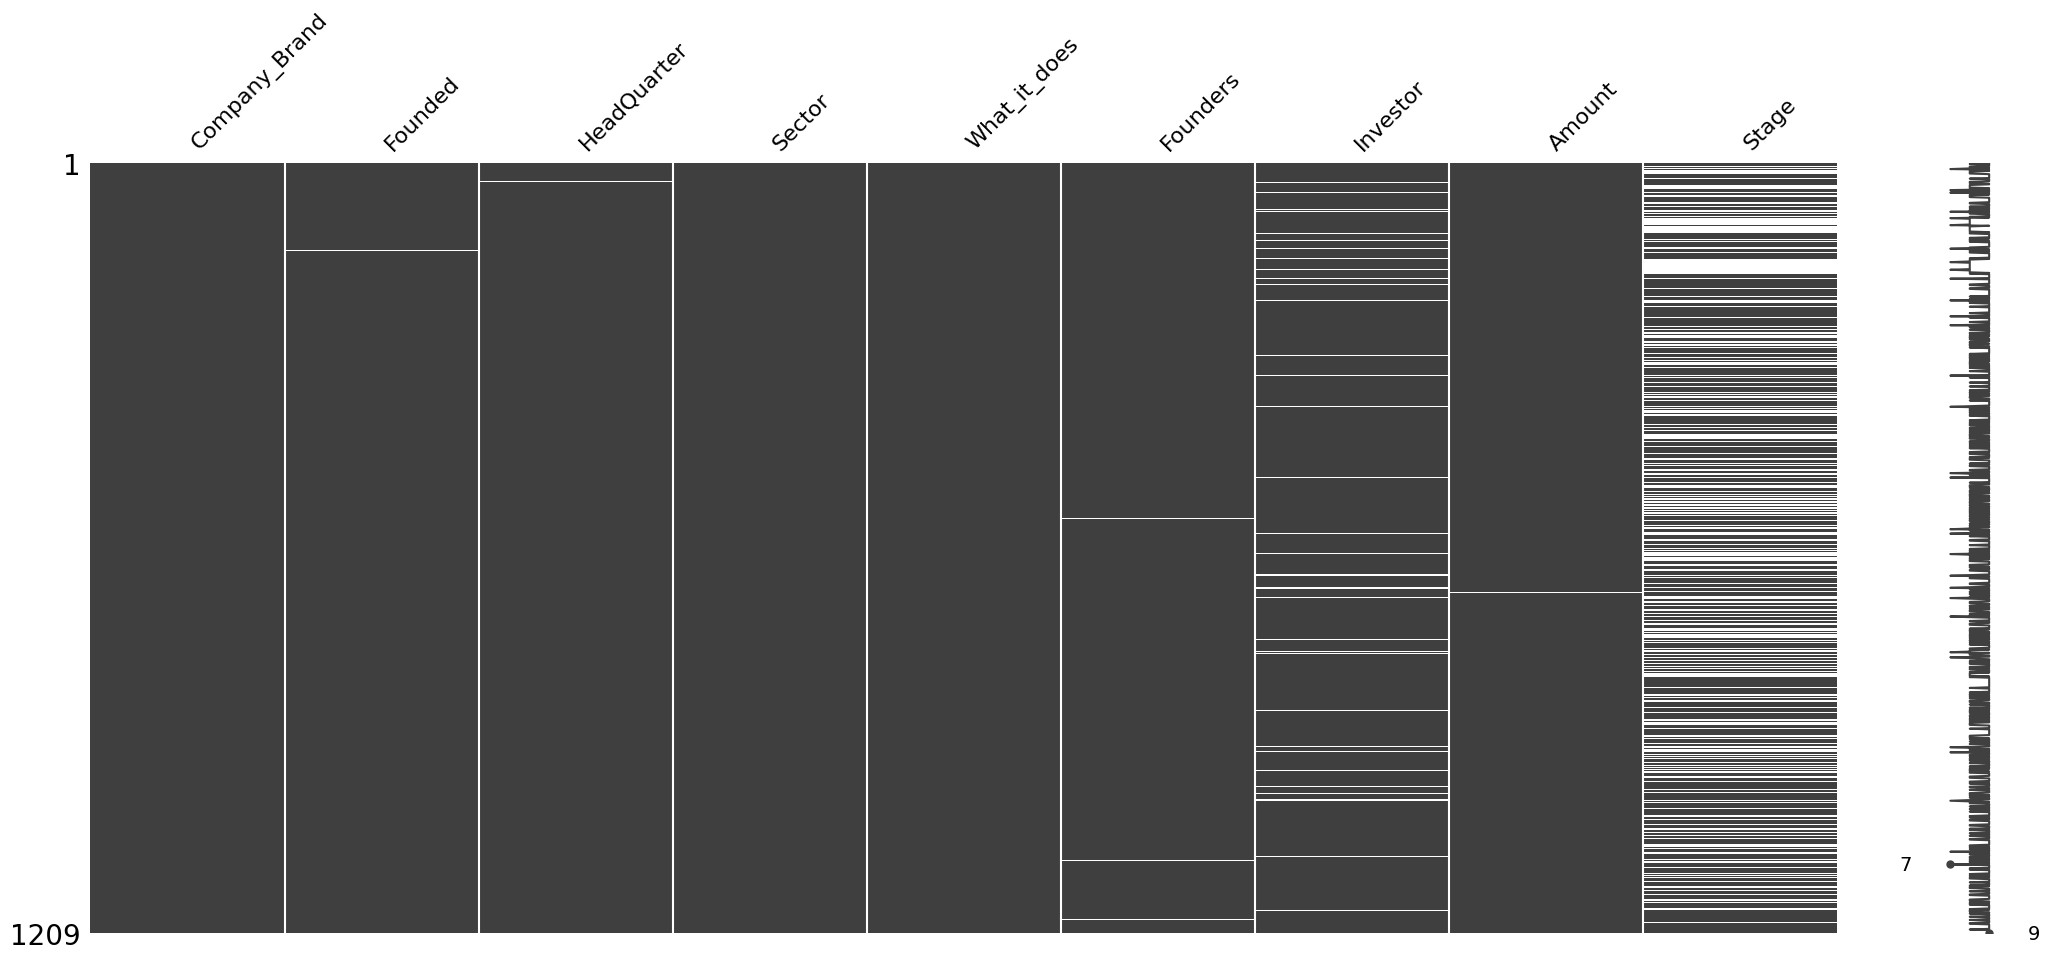

In [459]:
#Visualizing the missing values in data21
msno.matrix(data21)

From the above, columns with missing values Founded , HeadQuarter ,Founders , Investor, Amount , Stage 

In [460]:
# Drop duplicates
data21.drop_duplicates(inplace=True)

In [461]:
# confirm changes
data21.duplicated().sum()

0

From the above, all duplicates have been dropped in data21 to simplify and make the data concise enough because total number of duplicates was 19. 


In [462]:
# Entries in wrong columns
data21.loc[[98,241,242,257,538,545,551,674,677,1100,1148,1176]]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,None,$6000000
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None


In [463]:
# Correcting entries in wrong columns
# LABEL 98 (FanPlay)
data21.loc[98, "Amount"] = "$1200000"
data21.loc[98, "Stage"] = "Undisclosed"
data21.loc[98, "Investor"] = "Upsparks"
data21.loc[98, "HeadQuarter"] = "Undisclosed"

# LABEL 241 (MasterChow)
data21.loc[241,  "HeadQuarter"] = "Hauz Khas"
data21.loc[241, "Sector"] = "Food & Beverages"

# LABEL 257(MoEVing)
data21.loc[257, "Amount"] = "$5000000"
data21.loc[257, "HeadQuarter"] = "Gurugram"
data21.loc[257, "Sector"] = "Electronic Vehicle"
data21.loc[257, "Stage"] = "Seed"
data21.loc[257, "Investor"] = "Anshuman Maheshwary, Dr Srihari Raju Kalidindi"

# LABEL 242, 256(Fullife Healthcare)
data21.loc[242, "Amount"] = "$22000000"
data21.loc[242, "Investor"] = "Morgan Stanley Private Equity Asia"
data21.loc[242, "Stage"] = "Series C"
data21.loc[242, "HeadQuarter"] = "Mumbai"
data21.loc[242, "Sector"] = "Pharmaceuticals"
data21.loc[242, "Founders"] = "Varun Khanna"
data21.loc[242, "What_it_does"] = "Primary Business is Development and Manufacture of sports nutrition and supplements"

# LABEL 538 (Little Leap)
data21.loc[538, "Amount"] = "$300000"
data21.loc[538, "Investor"] = "ah! Ventures"
data21.loc[538, "Stage"] = "Undisclosed"
data21.loc[538, "Founders"] = "Vishal Gupta"

# LABEL 545 (AdmitKard)
data21.loc[545, "Amount"] = "$1000000"
data21.loc[545, "Investor"] = "Unknown"
data21.loc[545, "Stage"] = "Pre-series A"
data21.loc[545, "Founders"] = "Vamsi Krishna, Pulkit Jain, Gaurav Munjal"

# LABEL 551 (BHyve)
data21.loc[551, "Amount"] = "$300000"
data21.loc[551, "Investor"] = "ITO Angel Network, LetsVenture, 100x.VC"
data21.loc[551, "Stage"] = "Undisclosed"
data21.loc[551, "Sector"] = "HR"

# LABEL 674 (MYRE Capital)
data21.loc[674, "Amount"] = "$6000000"
data21.loc[674, "Stage"] = "Undisclosed"

# LABEL 677 (Saarthi Pedagogy)
data21.loc[677, "Amount"] = "$1000000"
data21.loc[677, "Investor"] = "JITO Angel Network, LetsVenture"
data21.loc[677, "Stage"] = "Undisclosed"

# LABEL 1100(Sochcast)
data21.loc[1100, "Investor"] = "Undisclosed"
data21.loc[1100, "HeadQuarter"] = "Undisclosed"
data21.loc[1100, "Sector"] = "Online Media"

# LABEL 1148 (Godamwale)
data21.loc[1148, "Amount"] = "1000000"
data21.loc[1148, "Investor"] = "Undisclosed"
data21.loc[1148, "Stage"] = "Seed"

# LABEL 1176(Peak)
data21.loc[1176, "Sector"] = "Information Technology & Services"
data21.loc[1176, "HeadQuarter"] = "Manchester"
data21

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In analyzing the specific dataset location, manual inspection, and cross-referencing was employed especially since they are not many.

In [464]:
#Cleaning the column names of the 2021_dataset
data21= data21.rename(columns=lambda x: x.lower().replace(' ', '_'))
# rename company_brand to company/brand
data21 = data21.rename(columns={"company_brand":"company/brand"})
#Adding the year column
data21["funded_year"] = 2021
data21

,company/brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,funded_year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,2021


In [465]:
#Cleaning the amount column 

In [466]:
#checking for values that do not have the dollar sign attached
data21[~data21.amount.str.get(0).isin(['$'])]

,company/brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,funded_year
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2021
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None,2021
21,Uable,2020.0,Bangalore,EdTech,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",Undisclosed,Seed,2021
39,TruNativ,2019.0,Mumbai,Food & Beverages,TruNativ Foods & Beverages Pvt Ltd,"Pranav Malhotra, Mamta Malhotra",9Unicorns,Undisclosed,Seed,2021
54,AntWak,2019.0,Bangalore,EdTech,AntWak provides a video platform for e-learnin...,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah",Undisclosed,Seed,2021
64,Rage Coffee,2018.0,New Delhi,Food & Beverages,Rage Coffee is infused with plant based vitami...,Bharat Sethi,"GetVantage, Prakash Katama",Undisclosed,Pre-series A,2021
67,Kudos,2014.0,Pune,FinTech,"Kudos is a full stack NBFC, a digital lending ...",Naresh Vigh,Marquee fintech founders,Undisclosed,Pre-series A,2021
86,Onsurity,2020.0,Bangalore,HealthCare,Onsurity is an employee healthcare platform pr...,"Kulin Shah, Yogesh Agarwal","Jitendra Gupta, Harsh Shah",None,None,2021
316,Hubhopper,2015.0,New Delhi,Podcast,"Hubhopper is India's leading podcast hosting, ...",Gautam Raj Anand,"ITI Growth Opportunities Fund, Unit-E Ventures",Undisclosed,None,2021
319,Battery Smart,2019.0,New Delhi,Battery,Battery Smart provides advanced Li-ion batteri...,"Pulkit Khurana, Siddharth Sikka",Orios Venture Partners,Undisclosed,Seed,2021


In [467]:
data21.amount.unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

Above is still showing datatype as object, therefore further cleaning is neccassary 

In [468]:
# Remove the word with a value
data21['amount'] = data21['amount'].str.replace("1000000\t#REF!" , '1000000').replace('$Undisclosed', np.NaN).replace('$undisclosed',np.NaN).replace('Undisclosed', np.NaN)


In [469]:
#creating a function on amount column for data21
def clean_amount():
    # copy original amount columns
    amount_column = data21["amount"].copy().str.replace(",","") 
    
    # extract values in dollars($)
    amount_in_dollar_1 = amount_column[amount_column.str.startswith("$", na=False)]
    # strip off the dollar symbol
    amount_in_dollar_1 = amount_in_dollar_1.str.lstrip("$")

    # extract values in dollars($)
    amount_in_dollar_2 = amount_column[amount_column.str.startswith("$$", na=False)]

     # strip off the dollar symbol
    amount_in_dollar_2 = amount_in_dollar_2.str.lstrip("$$")
    # Replace the Unclean columns with the clean one

    amount_column.loc[amount_in_dollar_1.index] = amount_in_dollar_1
    amount_column.loc[amount_in_dollar_2.index] = amount_in_dollar_2
    
    # convert the clean column to numeric
    amount_column = pd.to_numeric(amount_column,errors="coerce")
    # update the amount column 
    data21["amount"] = amount_column
    
    data21

In [470]:
# check for Null Values in the amount column
data21["amount"].isna().sum()

139

In [471]:
clean_amount()

In [472]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company/brand  1190 non-null   object 
 1   founded        1189 non-null   float64
 2   headquarter    1189 non-null   object 
 3   sector         1190 non-null   object 
 4   what_it_does   1190 non-null   object 
 5   founders       1186 non-null   object 
 6   investor       1129 non-null   object 
 7   amount         1049 non-null   float64
 8   stage          773 non-null    object 
 9   funded_year    1190 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 134.6+ KB


In [473]:
#Cleaning the stage column 
modified_stage= data21.stage.unique()
modified_stage

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Undisclosed', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', 'Seies A',
       'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [474]:
# Replacing the values in the stage column with the modified stage dictionary
data21["stage"]= data21["stage"].replace(modified_stage)
modified_stage

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Undisclosed', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', 'Seies A',
       'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [475]:
# Checking for Nulls After cleaning the amount column
data21["amount"].isna().sum()

141

Null values still exist in amount column 

In [476]:
# perform a descriptive statistics after light cleaning of the amount column
data21.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company/brand,1190,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founded,1189.0,NaN,NaN,NaN,2016.634146,4.522098,1963.0,2015.0,2018.0,2020.0,2021.0
headquarter,1189,67,Bangalore,421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,1190,252,FinTech,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,1190,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founders,1186,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investor,1129,933,Inflection Point Ventures,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,1049.0,NaN,NaN,NaN,171218804.575786,4631144722.040095,10000.0,1000000.0,3500000.0,15000000.0,150000000000.0
stage,1190,1,Pre-series A,1190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_year,1190.0,NaN,NaN,NaN,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0


In [477]:

data21["amount"].unique()

array([1.20e+06, 1.20e+08, 3.00e+07, 5.10e+07, 2.00e+06, 1.88e+08,
       2.00e+05,      nan, 1.00e+06, 3.00e+06, 1.00e+05, 7.00e+05,
       9.00e+06, 4.00e+07, 4.90e+07, 4.00e+05, 3.00e+05, 2.50e+07,
       1.60e+08, 1.50e+05, 1.80e+06, 5.00e+06, 8.50e+05, 5.30e+07,
       5.00e+05, 1.10e+06, 6.00e+06, 8.00e+05, 1.00e+07, 2.10e+07,
       7.50e+06, 2.60e+07, 7.40e+06, 1.50e+06, 6.00e+05, 8.00e+08,
       1.70e+07, 3.50e+06, 1.50e+07, 2.15e+08, 2.50e+06, 3.50e+08,
       5.50e+06, 8.30e+07, 1.10e+08, 5.00e+08, 6.50e+07, 1.50e+11,
       3.00e+08, 2.20e+06, 3.50e+07, 1.40e+08, 4.00e+06, 1.30e+07,
       9.50e+06, 8.00e+06, 1.20e+07, 1.70e+06, 1.50e+08, 1.00e+08,
       2.25e+08, 6.70e+06, 1.30e+06, 2.00e+07, 2.50e+05, 5.20e+07,
       3.80e+06, 1.75e+07, 4.20e+07, 2.30e+06, 7.00e+06, 4.50e+08,
       2.80e+07, 8.50e+06, 3.70e+07, 3.70e+08, 1.60e+07, 4.40e+07,
       7.70e+05, 1.25e+08, 5.00e+07, 4.90e+06, 1.45e+08, 2.20e+07,
       7.00e+07, 6.60e+06, 3.20e+07, 2.40e+07, 7.25e+05, 4.61e

In [478]:
data21["amount"].isna().sum()

141

In [496]:
#Filling of missing values in the amount column with the median 
# Calculate the median of the column
median_value = data21['amount'].median()

# Fill NaN values in the column with the median
data21['amount'] = data21['amount'].fillna(median_value)

In [497]:
# check for changes
data21["amount"].isna().sum()

0

In [481]:
#Cleaning the Sector column 
# check for unique values in the column
data21["sector"].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [482]:
sector_mapping_2021 = {
    'AI startup': 'IT & Technology',
    'EdTech': 'Education',
    'B2B E-commerce': 'Retail',
    'FinTech': 'Financial Services',
    'Home services': 'Business Services',
    'HealthTech': 'Healthcare & Life Sciences',
    'Tech Startup': 'IT & Technology',
    'E-commerce': 'Retail',
    'B2B service': 'Business Services',
    'Helathcare': 'Healthcare & Life Sciences',
    'Renewable Energy': 'Energy',
    'Electronics': 'Manufacturing',
    'IT startup': 'IT & Technology',
    'Food & Beverages': 'Consumer Goods',
    'Aeorspace': 'Manufacturing',
    'Deep Tech': 'IT & Technology',
    'Dating': 'Media & Entertainment',
    'Gaming': 'Media & Entertainment',
    'Robotics': 'Manufacturing',
    'Retail': 'Retail',
    'Food': 'Consumer Goods',
    'Oil and Energy': 'Energy',
    'AgriTech': 'Agriculture',
    'Telecommuncation': 'IT & Technology',
    'Milk startup': 'Consumer Goods',
    'AI Chatbot': 'IT & Technology',
    'IT': 'IT & Technology',
    'Logistics': 'Transportation & Logistics',
    'Hospitality': 'Travel & Tourism',
    'Fashion': 'Consumer Goods',
    'Marketing': 'Business Services',
    'Transportation': 'Transportation & Logistics',
    'LegalTech': 'Business Services',
    'Food delivery': 'Food & Beverages',
    'Automotive': 'Manufacturing',
    'SaaS startup': 'IT & Technology',
    'Fantasy sports': 'Sports',
    'Video communication': 'Media & Entertainment',
    'Social Media': 'Media & Entertainment',
    'Skill development': 'Education',
    'Rental': 'Real Estate',
    'Recruitment': 'Business Services',
    'HealthCare': 'Healthcare & Life Sciences',
    'Sports': 'Sports',
    'Computer Games': 'Media & Entertainment',
    'Consumer Goods': 'Consumer Goods',
    'Information Technology': 'IT & Technology',
    'Apparel & Fashion': 'Consumer Goods',
    'Logistics & Supply Chain': 'Transportation & Logistics',
    'Healthtech': 'Healthcare & Life Sciences',
    'Healthcare': 'Healthcare & Life Sciences',
    'SportsTech': 'Sports',
    'HRTech': 'Business Services',
    'Wine & Spirits': 'Consumer Goods',
    'Mechanical & Industrial Engineering': 'Manufacturing',
    'Spiritual': 'Others',
    'Financial Services': 'Financial Services',
    'Industrial Automation': 'Manufacturing',
    'Health': 'Healthcare & Life Sciences',
    'Lifestyle': 'Consumer Goods',
    'IoT': 'IT & Technology',
    'Banking': 'Financial Services',
    'Computer software': 'IT & Technology',
    'Tech startup': 'IT & Technology',
    'Digital mortgage': 'Financial Services',
    'Information Technology & Services': 'IT & Technology',
    'Furniture': 'Consumer Goods',
    'B2B marketplace': 'Retail',
    'Healtcare': 'Healthcare & Life Sciences',
    'Location Analytics': 'IT & Technology',
    'Media': 'Media & Entertainment',
    'Consumer Electronics': 'Consumer Goods',
    'Tobacco': 'Consumer Goods',
    'Deeptech': 'IT & Technology',
    'Insuretech': 'Financial Services',
    'MLOps platform': 'IT & Technology',
    'Venture Capital': 'Financial Services',
    'Pet care': 'Healthcare & Life Sciences',
    'Drone': 'Manufacturing',
    'Wholesale': 'Retail',
    'Construction': 'Manufacturing',
    'E-learning': 'Education',
    'Consumer Services': 'Consumer Goods',
    'Venture Capital & Private Equity': 'Financial Services',
    'Health, Wellness & Fitness': 'Healthcare & Life Sciences',
    'OTT': 'Media & Entertainment',
    'Education Management': 'Education',
    'Computer Software': 'IT & Technology',
    'Insurance': 'Financial Services',
    'Software Startup': 'IT & Technology',
    'Computer & Network Security': 'IT & Technology',
    'Capital Markets': 'Financial Services',
    'Social network': 'IT & Technology',
    'Hospital & Health Care': 'Healthcare & Life Sciences',
    'Music': 'Media & Entertainment',
    'Pharmaceuticals': 'Healthcare & Life Sciences',
    'Electronic Vehicle': 'Manufacturing',
    'Cosmetics': 'Consumer Goods',
    'Mobility': 'Transportation & Logistics',
    'Social media': 'Media & Entertainment',
    'Real Estate': 'Real Estate',
    'Digital platform': 'IT & Technology',
    'B2B Ecommerce': 'Retail',
    'Online Media': 'Media & Entertainment',
    'Social commerce': 'Retail',
    'Mobile Games': 'Media & Entertainment',
    'Food Production': 'Food & Beverages',
    'Podcast': 'Media & Entertainment',
    'HeathTech': 'Healthcare & Life Sciences',
    'Battery': 'Energy',
    'Content publishing': 'Media & Entertainment',
    'Water purification': 'Others',
    'Content commerce': 'Media & Entertainment',
    'Innovation Management': 'Business Services',
    'Software company': 'IT & Technology',
    'Automation': 'Manufacturing',
    'Food Industry': 'Consumer Goods',
    'Celebrity Engagement': 'Media & Entertainment',
    'Trading platform': 'Financial Services',
    'Personal Care': 'Consumer Goods',
    'Cannabis startup': 'Consumer Goods',
    'Blogging': 'Media & Entertainment',
    'Consulting': 'Business Services',
    'BioTechnology': 'Healthcare & Life Sciences',
    'B2B Marketplace': 'Retail',
    'Health care': 'Healthcare & Life Sciences',
    'Social audio': 'Media & Entertainment',
    'Fashion and lifestyle': 'Consumer Goods',
    'Delivery service': 'Transportation & Logistics',
    'B2B Manufacturing': 'Manufacturing',
    'Home Decor': 'Consumer Goods',
    'Solar': 'Energy',
    'TaaS startup': 'Transportation & Logistics',
    'EV startup': 'Manufacturing',
    'HR Tech': 'Business Services',
    'Blockchain startup': 'IT & Technology',
    'Food and Beverages': 'Consumer Goods',
    'Beverages': 'Consumer Goods',
    'Manufacturing startup': 'Manufacturing',
    'Cryptocurrency': 'Financial Services',
    'Vehicle repair startup': 'Manufacturing',
    'Advisory firm': 'Business Services',
    'Legaltech': 'Business Services',
    'Pollution control equiptment': 'Manufacturing',
    'Fashion & Lifestyle': 'Consumer Goods',
    'Blockchain': 'IT & Technology',
    'Fitness': 'Healthcare & Life Sciences',
    'D2C': 'Retail',
    'Automobile': 'Manufacturing',
    'Environmental Services': 'Others',
    'Merchandise': 'Retail',
    'Facilities Services': 'Business Services',
    'Marketing & Advertising': 'Business Services',
    'Human Resources': 'Business Services',
    'Eyewear': 'Consumer Goods',
    'D2C Business': 'Retail',
    'Biotechnology': 'Healthcare & Life Sciences',
    'Farming': 'Agriculture',
    'NFT Marketplace': 'IT & Technology',
    'Internet': 'IT & Technology',
    'SpaceTech': 'IT & Technology',
    'Consumer software': 'IT & Technology',
    'Social community': 'IT & Technology',
    'Fishery': 'Agriculture',
    'HR': 'Business Services',
    'Renewables & Environment': 'Energy',
    'Online storytelling': 'Media & Entertainment',
    'Aviation': 'Transportation & Logistics',
    'IT company': 'IT & Technology',
    'Environmental service': 'Others',
    'Job discovery platform': 'Business Services',
    'D2C Fashion': 'Retail',
    'Heathcare': 'Healthcare & Life Sciences',
    'CRM': 'IT & Technology',
    'Software': 'IT & Technology',
    'Nutrition': 'Healthcare & Life Sciences',
    'D2C startup': 'Retail',
    'Innovation management': 'Business Services',
    'Community platform': 'IT & Technology',
    'Venture capitalist': 'Financial Services',
    'Networking': 'IT & Technology',
    'Commercial Real Estate': 'Real Estate',
    'AR startup': 'IT & Technology',
    'Consumer service': 'Business Services',
    'Consumer goods': 'Consumer Goods',
    'MarTech': 'Business Services',
    'Advertisement': 'Business Services',
    'Content creation': 'Media & Entertainment',
    'Augmented reality': 'IT & Technology',
    'Rental space': 'Real Estate',
    'Bike Rental': 'Transportation & Logistics',
    'Beauty products': 'Consumer Goods',
    'Tourism': 'Travel & Tourism',
    'FemTech': 'Healthcare & Life Sciences',
    'Cultural': 'Media & Entertainment',
    'Co-working': 'Real Estate',
    'InsureTech': 'Financial Services',
    'Supply chain platform': 'Business Services',
    'Social platform': 'IT & Technology',
    'CleanTech': 'Energy',
    'AI company': 'IT & Technology',
    'Sports startup': 'Sports',
    'Matrimony': 'Others',
    'Crypto': 'Financial Services',
    'Clothing': 'Consumer Goods',
    'Analytics': 'IT & Technology',
    'Finance': 'Financial Services',
    'IoT platform': 'IT & Technology',
    'Commerce': 'Retail',
    'Defense & Space': 'Manufacturing',
    'Entertainment': 'Media & Entertainment',
    'Business Supplies & Equipment': 'Business Services',
    'NFT': 'IT & Technology',
    'Oil & Energy': 'Energy',
    'EV': 'Manufacturing',
    'Company-as-a-Service': 'Business Services',
    'Textiles': 'Manufacturing',
    'Professional Training & Coaching': 'Education',
    'Maritime': 'Transportation & Logistics',
    'Housing Marketplace': 'Real Estate',
    'Furniture Rental': 'Consumer Goods',
    'Telecommunications': 'IT & Technology',
    'Equity Management': 'Financial Services',
    'Cloud kitchen': 'Food & Beverages',
    'Nanotechnology': 'Manufacturing',
    'Community': 'Business Services',
    'Higher Education': 'Education',
    'B2B': 'Business Services',
    'Mechanical Or Industrial Engineering': 'Manufacturing',
    'D2C jewellery': 'Retail',
    'Sales and Distribution': 'Business Services',
    'SaaS': 'IT & Technology',
    'Information Services': 'IT & Technology',
    'Translation & Localization': 'Business Services',
    'Investment Banking': 'Financial Services',
    'Femtech': 'Healthcare & Life Sciences',
    'sports': 'Sports',
    'Foootwear': 'Consumer Goods',
    'Legal Services': 'Business Services',
    'Veterinary': 'Healthcare & Life Sciences',
    'Arts & Crafts': 'Media & Entertainment',
    'Investment Management': 'Financial Services',
    'Education': 'Education',
    'Management Consulting': 'Business Services',
    'B2B startup': 'Business Services',
    'Design': 'Business Services',
    'B2B Travel': 'Business Services',
    'Interior Design': 'Consumer Goods',
    'Product studio': 'Business Services',
    'Aviation & Aerospace': 'Transportation & Logistics',
    'Staffing & Recruiting': 'Business Services',
    
}

In [483]:
# mapping the sectors into the key sectors of the economy
data21["sector"] = data21["sector"].replace(sector_mapping_2021)
data21["sector"].unique()

array(['IT & Technology', 'Education', 'Retail', 'Financial Services',
       'Business Services', 'Healthcare & Life Sciences', 'Energy',
       'Manufacturing', 'Consumer Goods', 'Media & Entertainment',
       'Agriculture', 'Transportation & Logistics', 'Travel & Tourism',
       'Food & Beverages', 'Sports', 'Real Estate', 'Others',
       'Real estate'], dtype=object)

In [488]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1186 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company/brand  1186 non-null   object 
 1   founded        1185 non-null   float64
 2   headquarter    1185 non-null   object 
 3   sector         1186 non-null   object 
 4   what_it_does   1186 non-null   object 
 5   founders       1186 non-null   object 
 6   investor       1186 non-null   object 
 7   amount         1186 non-null   float64
 8   stage          1186 non-null   object 
 9   funded_year    1186 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 101.9+ KB


In [490]:
#Replacing investor column with undisclosed 
data21['investor'] = data21['investor'].fillna('Undisclosed')

In [492]:
# Drop all rows with any missing values
data21.dropna(inplace=True)


#Reason being the present missing rows are single values

In [493]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1184 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company/brand  1184 non-null   object 
 1   founded        1184 non-null   float64
 2   headquarter    1184 non-null   object 
 3   sector         1184 non-null   object 
 4   what_it_does   1184 non-null   object 
 5   founders       1184 non-null   object 
 6   investor       1184 non-null   object 
 7   amount         1184 non-null   float64
 8   stage          1184 non-null   object 
 9   funded_year    1184 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 101.8+ KB
